In [3]:
import pandas as pd

partial_results = [
    "../data/experiment1-final/r_1.csv",
    "../data/experiment1-final/r_2.csv",
    "../data/experiment1-final/r_3.csv",
    "../data/experiment1-final/r_4.csv",
    "../data/experiment1-final/r_5.csv",
    "../data/experiment1-final/r_6.csv",
    "../data/experiment1-final/r_7.csv",
    "../data/experiment1-final/r_8.csv",
    "../data/experiment1-final/r_9.csv",
    "../data/experiment1-final/r_10.csv",
    "../data/experiment1-final/r_11.csv",
    "../data/experiment1-final/r_12.csv"
]

results = pd.concat([pd.read_csv(filepath_or_buffer=p, sep=',') for p in partial_results])

description = results.groupby(["model_type", "metric_set", "smell_models"]).describe()

description = results.filter(["model_type", "metric_set", "real_mcc"]).groupby(["model_type", "metric_set"]).describe()
description

real_mcc                      \
                                              count      mean       std   
model_type            metric_set                                          
basic-adaboost        all-non-null-numeric     24.0  0.453330  0.004781   
                      javametrics-numeric      24.0  0.257133  0.011685   
                      javametrics2             24.0  0.307364  0.006359   
                      javametrics2-process     24.0  0.306179  0.028635   
                      javametrics2-product     24.0  0.257101  0.005857   
...                                             ...       ...       ...   
unscaled-randomforest none                     12.0  0.224693  0.004287   
                      pmd                      24.0  0.330654  0.006375   
                      process                  16.0  0.523188  0.007336   
                      product                  24.0  0.348961  0.005706   
                      pydriller                24.0  0.482839  0.006494   

                                                                          \
                                                 min       25%       50%   
model_type            metric_set                                           
basic-adaboost        all-non-null-numeric  0.446486  0.448431  0.453405   
                      javametrics-numeric   0.217090  0.253671  0.259184   
                      javametrics2          0.296663  0.302579  0.306550   
                      javametrics2-process  0.189873  0.300445  0.307853   
                      javametrics2-product  0.246321  0.252527  0.256712   
...                                              ...       ...       ...   
unscaled-randomforest none                  0.218772  0.220510  0.225874   
                      pmd                   0.321442  0.325257  0.329597   
                      process               0.511766  0.516933  0.523830   
                      product               0.338305  0.345880  0.348542   
                      pydriller             0.472611  0.477882  0.482591   

                                                                
                                                 75%       max  
model_type            metric_set                                
basic-adaboost        all-non-null-numeric  0.455361  0.463184  
                      javametrics-numeric   0.262502  0.281391  
                      javametrics2          0.311026  0.319692  
                      javametrics2-process  0.318415  0.352639  
                      javametrics2-product  0.262449  0.267483  
...                                              ...       ...  
unscaled-randomforest none                  0.228688  0.229754  
                      pmd                   0.333374  0.343844  
                      process               0.527285  0.539625  
                      product               0.354159  0.359679  
                      pydriller             0.485884  0.496998  

[70 rows x 8 columns]

In [4]:
series = description.filter([("real_mcc", "50%")]).reset_index()
series["mcc"] = series[("real_mcc", "50%")]
series


,model_type,metric_set,real_mcc,mcc
,,,50%,
0,basic-adaboost,all-non-null-numeric,0.453405,0.453405
1,basic-adaboost,javametrics-numeric,0.259184,0.259184
2,basic-adaboost,javametrics2,0.306550,0.306550
3,basic-adaboost,javametrics2-process,0.307853,0.307853
4,basic-adaboost,javametrics2-product,0.256712,0.256712
...,...,...,...,...
65,unscaled-randomforest,none,0.225874,0.225874
66,unscaled-randomforest,pmd,0.329597,0.329597
67,unscaled-randomforest,process,0.523830,0.523830


[Text(0.5, 0, 'Metric set'), Text(0, 0.5, 'MCC')]

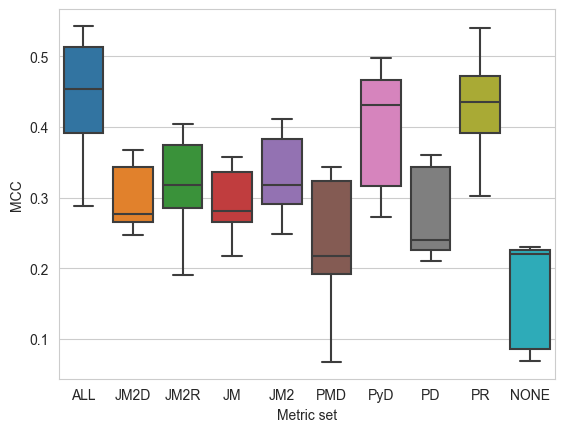

In [14]:
import seaborn as sns

METRIC_SET_MAPPING = {
    "none": "NONE",
    "all-non-null-numeric": "ALL",
    "pydriller": "PyD",
    "product": "PD",
    "process": "PR",
    "javametrics-numeric": "JM",
    "javametrics2": "JM2",
    "javametrics2-process": "JM2R",
    "javametrics2-product": "JM2D",
    "pmd": "PMD"
}

metricset_data = results.filter(["real_mcc", "real_precision", "metric_set"])
metricset_data["metric_set"] = metricset_data["metric_set"].map(METRIC_SET_MAPPING)

sns.boxplot(
    metricset_data, y="real_mcc", x="metric_set"
).set(xlabel="Metric set", ylabel="MCC")

In [6]:
metricset_summary = metricset_data.groupby("metric_set").describe()

metricset_summary.style.to_latex("metrics-multiple.tex")

metricset_summary

real_mcc                                                    \
              count      mean       std       min       25%       50%   
metric_set                                                              
ALL           168.0  0.438678  0.075259  0.287957  0.391390  0.453405   
JM            168.0  0.297536  0.037701  0.217090  0.265224  0.280873   
JM2           168.0  0.326873  0.048265  0.248080  0.290752  0.317456   
NONE           84.0  0.182707  0.065552  0.069082  0.085782  0.220279   
PD            168.0  0.277287  0.057142  0.210884  0.225350  0.240464   
PMD           168.0  0.237716  0.087518  0.067348  0.192115  0.217217   
PR            153.0  0.429673  0.064760  0.302152  0.391910  0.435555   
PyD           168.0  0.396968  0.076544  0.272601  0.316041  0.430855   

                               real_precision                                \
                 75%       max          count      mean       std       min   
metric_set                                                                    
ALL         0.513023  0.543000          168.0  0.594153  0.058286  0.478503   
JM          0.336499  0.357351          168.0  0.412761  0.020111  0.355360   
JM2         0.383441  0.410716          168.0  0.423616  0.023500  0.396614   
NONE        0.226452  0.230067           84.0  0.460626  0.010346  0.446937   
PD          0.343242  0.359679          168.0  0.382292  0.024466  0.353569   
PMD         0.322935  0.343844          168.0  0.363190  0.035384  0.303130   
PR          0.472073  0.539625          153.0  0.605472  0.057667  0.481208   
PyD         0.466461  0.496998          168.0  0.640217  0.062712  0.501105   

                                                    
                 25%       50%       75%       max  
metric_set                                          
ALL         0.559041  0.597299  0.638269  0.686353  
JM          0.398972  0.413895  0.429095  0.449315  
JM2         0.405521  0.412531  0.442302  0.476784  
NONE        0.454249  0.458362  0.462925  0.486381  
PD          0.361525  0.365947  0.409789  0.418486  
PMD         0.335269  0.356852  0.398666  0.408790  
PR          0.587674  0.623562  0.642558  0.698620  
PyD         0.599906  0.653323  0.689576  0.718645

[Text(0.5, 0, 'Metric set'), Text(0, 0.5, 'Precision')]

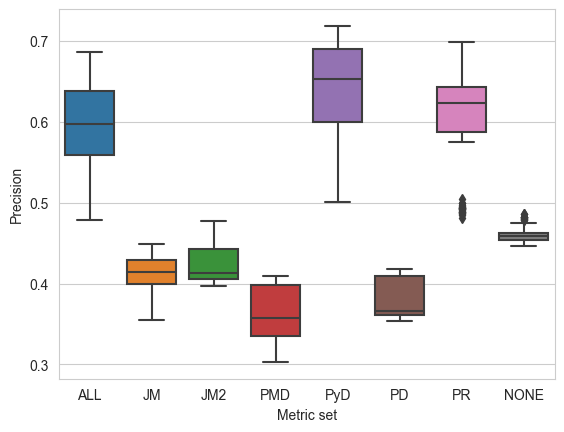

In [7]:
sns.boxplot(
    metricset_data, y="real_precision", x="metric_set"
).set(xlabel="Metric set", ylabel="Precision")

[Text(0.5, 0, 'ML model'), Text(0, 0.5, 'MCC')]

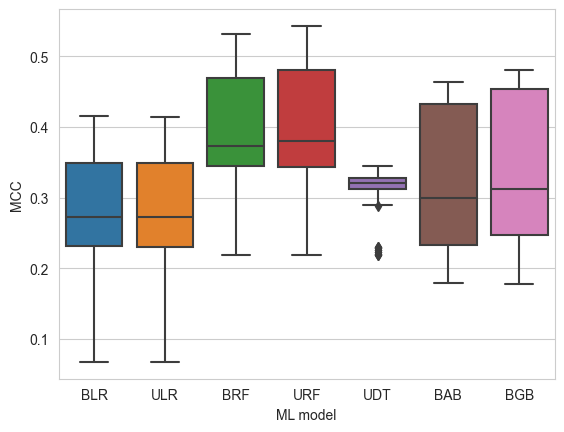

In [8]:
MODEL_NAME_MAPPING = {
    "basic-linear-ridge": "BLR",
    "unscaled-linear": "ULR",
    "basic-randomforest": "BRF",
    "unscaled-randomforest": "URF",
    "unscaled-decisiontree": "UDT",
    "basic-adaboost": "BAB",
    "basic-gradientboost": "BGB"
}

modeltype_data = results.filter(["real_mcc", "real_precision", "model_type"])
modeltype_data["model_type"] = modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

sns.boxplot(
    modeltype_data, y="real_mcc", x="model_type"
).set(xlabel="ML model", ylabel="MCC")

[Text(0.5, 0, 'ML model'), Text(0, 0.5, 'Precision')]

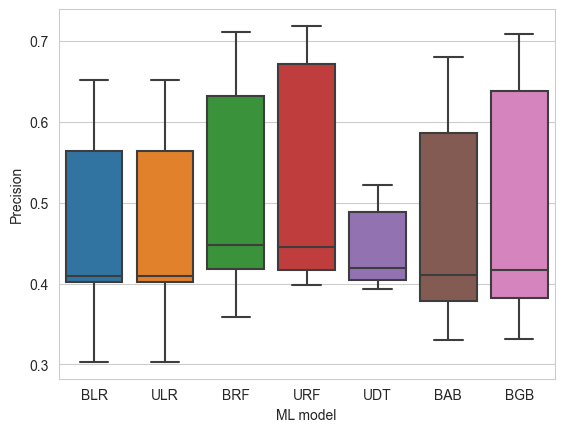

In [9]:
sns.boxplot(
    modeltype_data, y="real_precision", x="model_type"
).set(xlabel="ML model", ylabel="Precision")

In [10]:
modelset_summary = modeltype_data.groupby("model_type").describe()

modelset_summary.style.to_latex("models-multiple.tex")

modelset_summary


real_mcc                                                    \
              count      mean       std       min       25%       50%   
model_type                                                              
BAB           228.0  0.315015  0.093287  0.179672  0.232403  0.299662   
BGB           228.0  0.327438  0.098776  0.178078  0.247687  0.311758   
BLR           228.0  0.273975  0.090530  0.067348  0.230764  0.273038   
BRF           221.0  0.392252  0.079446  0.218772  0.344608  0.372797   
UDT           228.0  0.315434  0.024170  0.218772  0.312623  0.320674   
ULR           228.0  0.273900  0.090523  0.067348  0.230700  0.272744   
URF           220.0  0.397048  0.083674  0.218772  0.343660  0.379912   

                               real_precision                                \
                 75%       max          count      mean       std       min   
model_type                                                                    
BAB         0.432623  0.463184          228.0  0.459672  0.110262  0.330767   
BGB         0.453924  0.480621          228.0  0.474717  0.125552  0.332094   
BLR         0.349651  0.415286          228.0  0.461274  0.100679  0.303130   
BRF         0.468622  0.531415          221.0  0.498136  0.106766  0.358191   
UDT         0.328132  0.344630          228.0  0.440534  0.041511  0.393316   
ULR         0.349651  0.414773          228.0  0.461174  0.100711  0.303130   
URF         0.480712  0.543000          220.0  0.506327  0.118879  0.397721   

                                                    
                 25%       50%       75%       max  
model_type                                          
BAB         0.379010  0.410587  0.586061  0.679800  
BGB         0.381892  0.416975  0.637783  0.708887  
BLR         0.402195  0.409646  0.564072  0.652231  
BRF         0.417826  0.447747  0.632082  0.710597  
UDT         0.405000  0.419488  0.488175  0.521835  
ULR         0.402190  0.409471  0.563554  0.652231  
URF         0.416785  0.444766  0.670979  0.718645

[Text(0.5, 0, 'Include smell models'), Text(0, 0.5, 'MCC')]

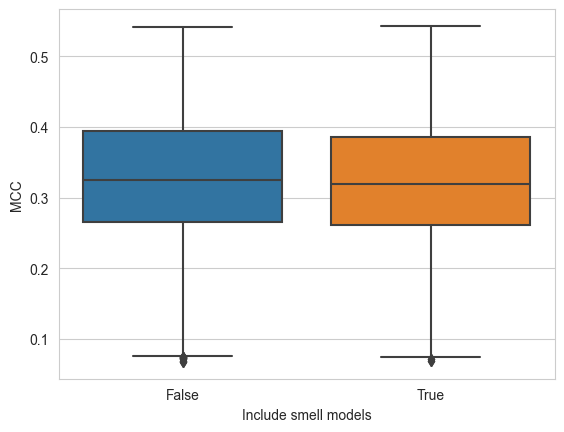

In [11]:
smell_data = results.filter(["real_mcc", "real_precision", "smell_models"])

sns.boxplot(
    smell_data, y="real_mcc", x="smell_models"
).set(xlabel="Include smell models", ylabel="MCC")

[Text(0.5, 0, 'Include smell models'), Text(0, 0.5, 'Precision')]

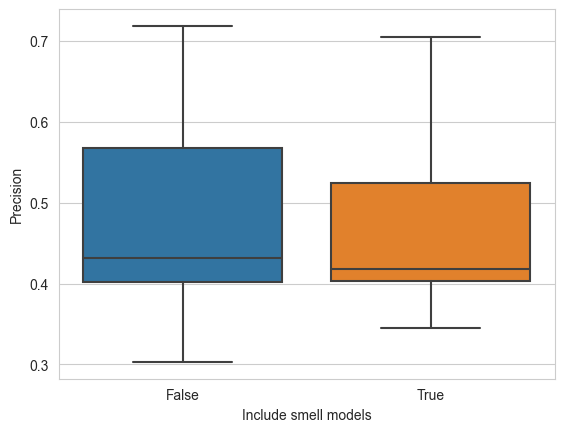

In [12]:
sns.boxplot(
    smell_data, y="real_precision", x="smell_models"
).set(xlabel="Include smell models", ylabel="Precision")